# Quickest Change Detection Demo Using the Shiryaev-Roberts Statistic

This notebook demonstrates using the Shiryaeve-Roberts statistic to perfom quickest change detection on a simple example. See Section III and in particular equation (20) of [Veeravalli & Banerjee](https://arxiv.org/pdf/1210.5552.pdf).

In [1]:
import numpy as np
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt

We generate and plot a first 500 samples i.i.d. from $\mathcal{N}\left(0, 1\right)$, and a second 500 samples i.i.d. from $\mathcal{N}\left(0.1, 1\right)$.

In [22]:
N = 500

mu0 = 0
mu1 = 0.1

def f0(x):
    return norm.pdf(x, loc=mu0)

def f1(x):
    return norm.pdf(x, loc=mu1)

x0 = np.random.normal(loc = mu0, size = N)
x1 = np.random.normal(loc = mu1, size = N)

x = np.concatenate((x0, x1))

Plotting the samples, it is difficult to visually distinguish that there has been a regime change.

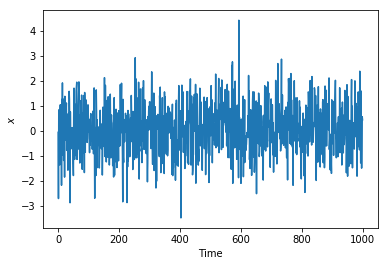

In [28]:
plt.figure()
plt.plot(x)
plt.xlabel('Time')
plt.ylabel(r'$x$')
plt.show()

The Shiryaev-Roberts (SR) statistic can be used to detect a regime change. It can be recursively computed by
\begin{equation}
\mathrm{SR}_{n + 1} = \left(1 + \mathrm{SR}_{n}\right)\mathrm{LR}\left(x_{n + 1}\right)
\end{equation}
with $\mathrm{SR}_{0} = 0$ and the likelihood ratio of an observation $\mathrm{LR}\left(x_{n + 1}\right)$ given by
\begin{equation}
\mathrm{LR}\left(x_{n + 1}\right) = \dfrac{f_{1}\left(x_{n + 1}\right)}{f_{0}\left(x_{n + 1}\right)}
\end{equation}
where $f_{1}\left(x_{n + 1}\right)$ is the density under a regime change and $f_{0}\left(x_{n + 1}\right)$ is the 'null' density. The update formula can also be converted to a update formula for the log Shiryaev-Roberts statistic (to help with numerical precision).

Note that this update formula corresponds to an 'uninformative' prior on regime change. If the prior distribution of the time of regime change is Geometrically distributed with probability parameter $\rho$, then the update formula becomes
\begin{equation}
\mathrm{SR}_{n + 1} = \dfrac{1 + \mathrm{SR}_{n}}{1 - \rho}\mathrm{LR}\left(x_{n + 1}\right)
\end{equation}

In [24]:
logSR = np.zeros(2*N)

logSRn = 1

for n in range(2*N):
    logSRn = np.log(1 + np.exp(logSRn)) + np.log(f1(x[n])) - np.log(f0(x[n]))
    logSR[n] = logSRn


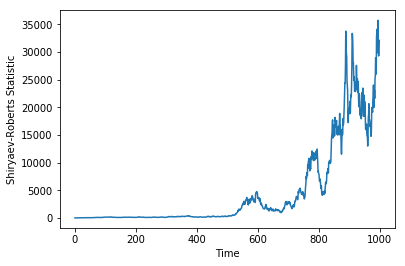

In [27]:
plt.figure()
plt.plot(np.exp(logSR))
plt.xlabel('Time')
plt.ylabel('Shiryaev-Roberts Statistic')
plt.show()

The behaviour of the SR statistic after the regime change at 500 time steps is clear. A quickest change detection algorithm can be formed by thresholding the SR statistic. The threshold can be used to control the probability of false alarm (ie. a lower threshold increases the probability of false alarm).